# 防止深度学习占用过多的内存，每次在运行前，释放gpu内存
* 在终端输入：**nvidis-smi**查看当前内存使用情况
*  sudo fuser /dev/nvidia*：查看进程编号
* kill -9 进程号（pid）

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
#创建数据集
fashion_mnist=keras.datasets.fashion_mnist
(train_imges,train_labels),(test_imges,test_labels)=fashion_mnist.load_data()  #划分数据集
#数据归一化
train_imges_sd=train_imges/255
test_imges_sd=test_imges/255

In [3]:
model=tf.keras.Sequential([
    #卷积层
    tf.keras.layers.Conv2D(filters=64,   #卷积核
                        kernel_size=3,  #卷积核纬度
                        padding="same",  #padding
                        activation="relu", #激活函数
                        input_shape=(28,28,1)  #输入得纬度
                        ),
    #maxpooling
    tf.keras.layers.MaxPool2D(pool_size=2,  #纬度除2
                            strides=2),  #步长
    #卷积层
    tf.keras.layers.Conv2D(filters=64,   #卷积核
                        kernel_size=3,  #卷积核纬度
                        padding="same",  #padding
                        activation="relu" #激活函数
                        ),
    #maxpooling
    tf.keras.layers.MaxPool2D(pool_size=2,  #纬度除2
                            strides=2),  #步长

    #全连接层
    tf.keras.layers.Flatten(),  #数据扁平化

    tf.keras.layers.Dense(units=128,  #神经元个数
                        activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.3),  #防止过拟合

    tf.keras.layers.Dense(units=10,  #输出是个结果的概率值
                        activation=tf.nn.softmax)  #softmax适用于多分类问题
])

#model.summary()  #查看模型
#定义优化器和损失函数
model.compile(optimizer="adam",
                loss='sparse_categorical_crossentropy',
                metrics=["accuracy"]
                )
hist=model.fit(x=train_imges_sd,y=train_labels,epochs=10,validation_data=(test_imges_sd,test_labels))

2022-04-09 22:10:08.771997: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-09 22:10:08.787620: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-09 22:10:08.788165: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-09 22:10:08.789730: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Epoch 1/10


2022-04-09 22:10:11.606804: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8204


1875/1875 [==============================] - 10s 4ms/step - loss: 0.4519 - accuracy: 0.8377 - val_loss: 0.3217 - val_accuracy: 0.8814
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2946 - accuracy: 0.8941 - val_loss: 0.2774 - val_accuracy: 0.8980
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2497 - accuracy: 0.9089 - val_loss: 0.2542 - val_accuracy: 0.9062
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2214 - accuracy: 0.9185 - val_loss: 0.2445 - val_accuracy: 0.9130
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1951 - accuracy: 0.9276 - val_loss: 0.2400 - val_accuracy: 0.9115
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1741 - accuracy: 0.9341 - val_loss: 0.2390 - val_accuracy: 0.9197
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1601 - accuracy: 0.9400 - val_loss: 0.2374 - val_accuracy: 0.9225
Ep

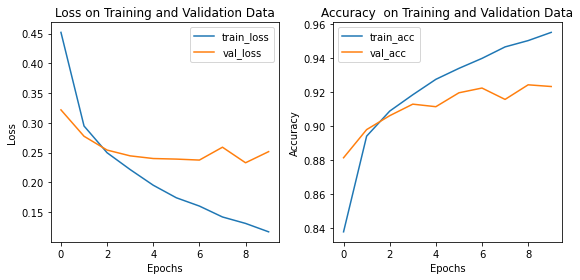

In [5]:
import matplotlib.pyplot as plt
# define the function
def training_vis(hist):
    loss = hist.history['loss']
    val_loss = hist.history['val_loss']
    acc = hist.history['accuracy']  # new version => hist.history['accuracy'] 
    val_acc = hist.history['val_accuracy'] #=> hist.history['val_accuracy'] 
    
    # make a figure
    fig = plt.figure(figsize=(8,4))
    # subplot loss
    ax1 = fig.add_subplot(121)
    ax1.plot(loss,label='train_loss')
    ax1.plot(val_loss,label='val_loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.set_title('Loss on Training and Validation Data')
    ax1.legend()
    # subplot acc
    ax2 = fig.add_subplot(122)
    ax2.plot(acc,label='train_acc')
    ax2.plot(val_acc,label='val_acc')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.set_title('Accuracy  on Training and Validation Data')
    ax2.legend()
    plt.tight_layout()

training_vis(hist)

# 模型测试

313/313 [==============================] - 1s 3ms/step - loss: 52.7010 - accuracy: 0.8825
[52.70100021362305, 0.8824999928474426]
2
2


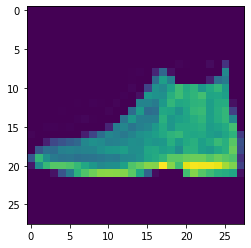

In [ ]:
import numpy as np
import matplotlib.pyplot  as plt

plt.imshow(test_imges_sd[0])

model_test=model.evaluate(test_imges,test_labels)  #模型评估
print(model_test)
#demo=tf.reshape(test_imges[0],(1,28,28))
#print(demo.shape)
prediction=model.predict(test_imges_sd)[1]
print(np.argmax(prediction)) #取大值
print(test_labels[1])

# 如何优化模型？

## 1、选择调整参数

In [ ]:
#参数调优
from kerastuner.tuners import Hyperband
from kerastuner.engine.hyperparameters import HyperParameters

hp=HyperParameters()
#构建神经元模型
def cnn(hp):
    model=tf.keras.Sequential([
        #卷积层
        tf.keras.layers.Conv2D(filters=hp.Int("filter1",min_value=32,max_value=64,step=16),   #卷积核
                            kernel_size=3,  #卷积核纬度
                            padding="same",  #padding
                            activation="relu", #激活函数
                            input_shape=(28,28,1)  #输入得纬度
                            ),
        #maxpooling
        tf.keras.layers.MaxPool2D(pool_size=2,  #纬度除2
                                strides=2),  #步长
        #卷积层
        tf.keras.layers.Conv2D(filters=hp.Int("filter2",min_value=32,max_value=64,step=16),   #卷积核
                            kernel_size=3,  #卷积核纬度
                            padding="same",  #padding
                            activation="relu" #激活函数
                            ),
        #maxpooling
        tf.keras.layers.MaxPool2D(pool_size=2,  #纬度除2
                                strides=2),  #步长

        #全连接层
        tf.keras.layers.Flatten(),  #数据扁平化
        tf.keras.layers.Dense(units=hp.Int("hidden_units1",min_value=32,max_value=128,step=16),  #神经元个数
                            activation=tf.nn.relu),
        tf.keras.layers.Dense(units=hp.Int("output_units",min_value=32,max_value=128,step=16),  #神经元个数，因为有10个类别
                            activation=tf.nn.softmax)
    ])
    #定义优化器和损失函数
    model.compile(optimizer="adam",
                loss='sparse_categorical_crossentropy',
                metrics=["accuracy"]
                )
    return model

tuner=Hyperband(
    hypermodel=cnn,  #优化对象
    objective="val_accuracy",  #用测试集得精确度作为参数选择的标准
    max_epochs=5,  #最大训练次数
    directory="fashion_parameters",  #保存参数的文件夹
    project_name='fashion',  #
    hyperparameters=hp  #使用的变量
)
tuner.search(x=train_imges,y=train_labels,epochs=3,validation_data=(test_imges_sd,test_labels)) #搜索参数

Trial 10 Complete [00h 00m 36s]
val_accuracy: 0.28369998931884766

Best val_accuracy So Far: 0.37790000438690186
Total elapsed time: 00h 04m 00s
INFO:tensorflow:Oracle triggered exit


In [ ]:
best_hp=tuner.get_best_hyperparameters(1)[0]  #获取最佳参数
print(best_hp.values)

#用这些参数构建最佳模型
best_model=tuner.hypermodel.build(best_hp)  #最佳模型
best_model.summary()

{'filter1': 64, 'filter2': 32, 'hidden_units1': 32, 'output_units': 112, 'tuner/epochs': 2, 'tuner/initial_epoch': 0, 'tuner/bracket': 1, 'tuner/round': 0}
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (

In [ ]:
#模型训练
hist=best_model.fit(x=train_imges_sd,y=train_labels,epochs=10,validation_data=(test_imges_sd,test_labels))
print(best_model.evaluate(test_imges,test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2808 - accuracy: 0.8976 - val_loss: 0.2811 - val_accuracy: 0.8984
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2466 - accuracy: 0.9112 - val_loss: 0.2848 - val_accuracy: 0.8950
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2240 - accuracy: 0.9182 - val_loss: 0.2813 - val_accuracy: 0.8969
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2064 - accuracy: 0.9247 - val_loss: 0.2498 - val_accuracy: 0.9083
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1883 - accuracy: 0.9313 - val_loss: 0.2490 - val_accuracy: 0.9104
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1758 - accuracy: 0.9343 - val_loss: 0.2454 - val_accuracy: 0.9132
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1632 - accuracy: 0.9399 - val_loss: 0.2573 - val_accuracy:

In [ ]:
# define the function
def training_vis(hist):
    loss = hist.history['loss']
    val_loss = hist.history['val_loss']
    acc = hist.history['accuracy']  # new version => hist.history['accuracy'] 
    val_acc = hist.history['val_accuracy'] #=> hist.history['val_accuracy'] 
    
    # make a figure
    fig = plt.figure(figsize=(8,4))
    # subplot loss
    ax1 = fig.add_subplot(121)
    ax1.plot(loss,label='train_loss')
    ax1.plot(val_loss,label='val_loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.set_title('Loss on Training and Validation Data')
    ax1.legend()
    # subplot acc
    ax2 = fig.add_subplot(122)
    ax2.plot(acc,label='train_acc')
    ax2.plot(val_acc,label='val_acc')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.set_title('Accuracy  on Training and Validation Data')
    ax2.legend()
    plt.tight_layout()

training_vis(hist)

## 2、数据增强

In [ ]:
from keras.preprocessing.image import  ImageDataGenerator,load_img,img_to_array  #数据增强

#定义数据增增强器
train_datagen=ImageDataGenerator(rotation_range=80,  #随机选择图片的角度
                            width_shift_range=0.6,  #随机水平平移
                            height_shift_range=0.2,  #随机竖直平移
                            rescale=1/255,    #数据归一化
                            shear_range=0.2,  #随机裁剪
                            zoom_range=0.2, #随机放大 
                            horizontal_flip=True,  #水平翻转
                            fill_mode="nearest",   #填充方式
                            )   
path=r"/home/bdai/718/tensroflow2022/2_CNN/case/case2_dog_or_cat/data/training"
train_data=train_datagen.flow_from_directory(directory=path,
                                            batch_size=10,      #批次
                                            target_size=(200,200),  #图片的大小\
                                            class_mode="binary"
                                            )


Found 8005 images belonging to 2 classes.


801


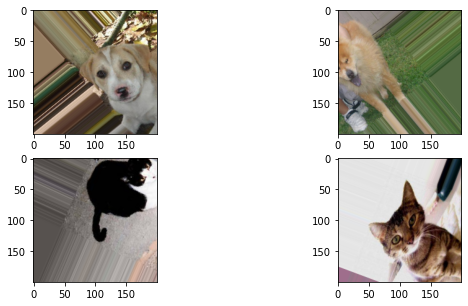

In [ ]:
train_images, _ = next(train_data)  #转化后的数据
print(len(train_data))
#创建画布
plt.figure(figsize=(10,5))
#显示图像
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(train_images[i])